In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [17]:
df1 = pd.read_csv('A3b_03_09 (1).txt',sep='\t')
df1.head()

,Time(s),ST-1,ST-2,ST-3,ST-4,SP-1,SC-1,AB-1,AVE-1,AR-1
0,0.0,32.553,112.097,59.508,62.708,4.079,34.480,1.25,1.0,0.0
1,0.9,32.543,112.553,59.539,62.726,4.079,34.522,1.25,1.0,0.0
2,1.0,32.544,112.587,59.539,62.726,4.079,34.545,1.25,1.0,0.0
3,2.0,32.532,112.725,59.454,62.654,4.079,34.524,1.25,1.0,1.0
4,3.0,32.526,112.604,59.254,62.456,4.079,34.800,1.25,1.0,1.0


In [34]:
# take df columns with reset index and take upto 845 seconds also take all columns
df = df1.iloc[90:680].reset_index(drop=True)
df.tail()

,Time(s),ST-1,ST-2,ST-3,ST-4,SP-1,SC-1,AB-1,AVE-1,AR-1
585,674.0,32.903,129.970,48.619,51.709,4.061,34.921,1.25,1.0,0.0
586,675.0,32.905,129.793,48.729,51.810,4.062,34.797,1.25,1.0,0.0
587,676.0,32.906,129.309,48.879,51.967,4.062,34.634,1.25,1.0,1.0
588,677.0,32.910,128.667,49.067,52.140,4.062,34.860,1.25,1.0,1.0
589,678.0,32.914,128.224,49.292,52.351,4.062,35.098,1.25,1.0,1.0


Text(0.5, 1.0, 'Reading of  ST-3 vs time')

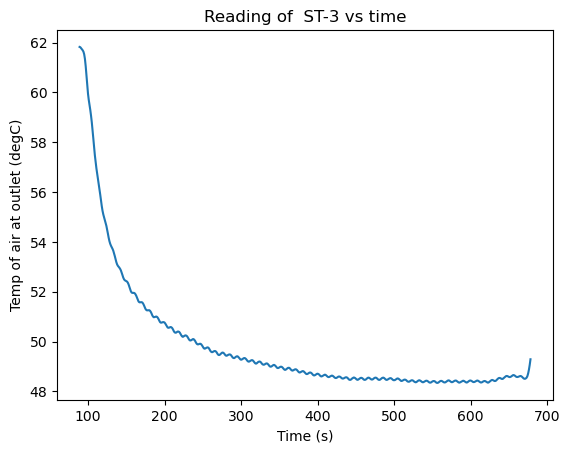

In [35]:
plt.plot(df['Time(s)'],df['ST-3'])
plt.xlabel('Time (s)')
plt.ylabel('Temp of air at outlet (degC)')
plt.title('Reading of  ST-3 vs time')

Text(0.5, 1.0, 'Reading of  ST-2 vs time')

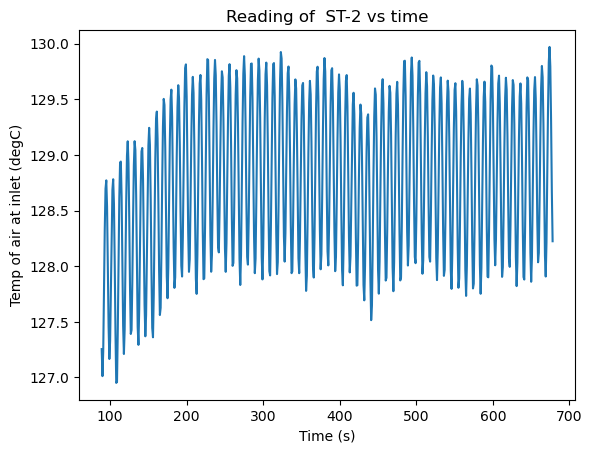

In [36]:
plt.plot(df['Time(s)'],df['ST-2'])
plt.xlabel('Time (s)')
plt.ylabel('Temp of air at inlet (degC)')
plt.title('Reading of  ST-2 vs time')

Text(0.5, 1.0, 'Reading of  SC-1 vs time')

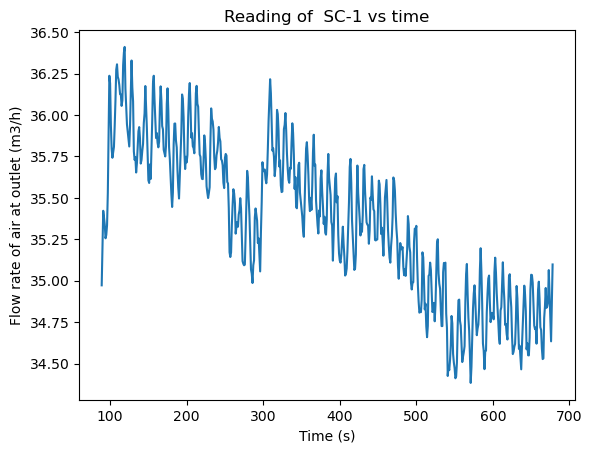

In [37]:
plt.plot(df['Time(s)'],df['SC-1'])
plt.xlabel('Time (s)')
plt.ylabel('Flow rate of air at outlet (m3/h)')
plt.title('Reading of  SC-1 vs time')

### Mass Balance


In [41]:
Y1 = 0.0227 # absolute humidity of inlet air from psychomteric chart (kg moisture/kg dry air)
Tg = np.average(df['ST-3']) # average temperature of air at outlet (deg C)
vh = (0.00283+0.00456*Y1)*(Tg+273) # m3/kg dry air

air_flow_rate = np.average(df['SC-1']) # average air flow rate at outlet (m3/h)
dry_air_flow_rate = air_flow_rate/vh # kg dry air/h
vh_new = df['SC-1']/dry_air_flow_rate #m3/kg dry air
# make a new series of vh_new with same index as df['ST-3'] and df['SC-1'] also included in the df
df['vh_new'] = vh_new
Y2 = (vh_new/(df['ST-3']+273) - 0.00283)/0.00456
df['Y2'] = Y2
dm_evaporated = dry_air_flow_rate*(Y2-Y1) # kg moisture/h
df['dm_evaporated'] = dm_evaporated
mass_evaporated = np.sum(dm_evaporated[dm_evaporated>0])/3600 # kg
print(f'Mass of water evaporated = {mass_evaporated} kg')

Mass of water evaporated = 0.018221220173962827 kg


### Energy Balance

In [43]:
# Cs = 1 + 1.88*Y2
df['Cs'] = 1 + 1.88*df['Y2']
H_air_in = dry_air_flow_rate * df['Cs'] * (df['ST-2'] - df['ST-3'])/3600 # kJ
df['H_air_in'] = H_air_in
lambda0 = 2502.3 # kJ/kg
Cp_liq = 4.184 # kJ/kg
Cp_vap = 1.88  # kJ/kg
Hv = dry_air_flow_rate * Y2 * (lambda0 - Cp_liq * df['ST-1'] + Cp_vap * df['ST-3'])/3600 # kJ
df['Hv'] = Hv

total_H_air_in = np.sum(H_air_in)
total_Hv = np.sum(Hv)
Hlost = total_H_air_in - total_Hv

print(f'Heat lost = {Hlost} kJ')

Heat lost = 161.78874000452015 kJ


Text(0.5, 1.0, 'Absolute humidity vs time')

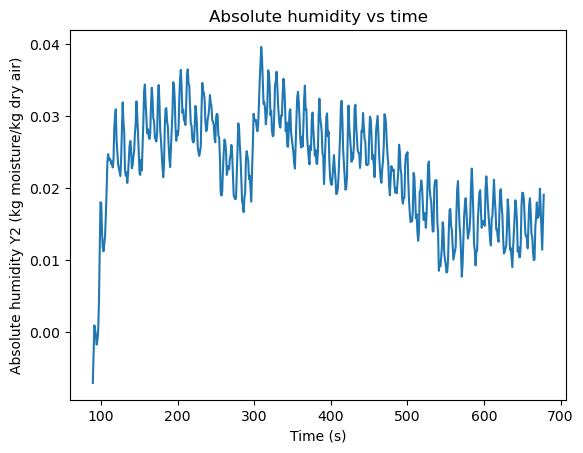

In [44]:
plt.plot(df['Time(s)'],Y2)
plt.xlabel('Time (s)')
plt.ylabel('Absolute humidity Y2 (kg moisture/kg dry air)')
plt.title('Absolute humidity vs time')

Text(0.5, 1.0, 'Change in absolute humidity vs time')

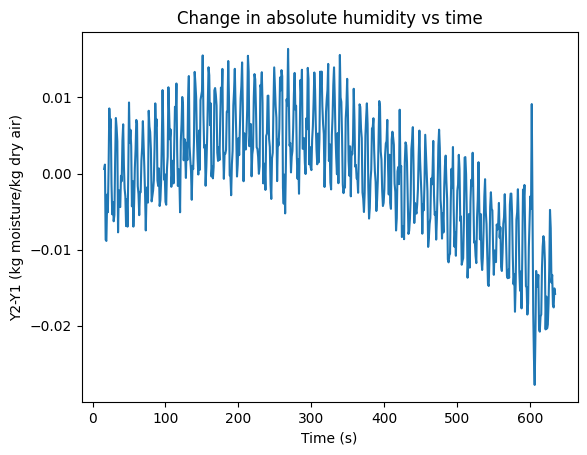

In [ ]:
plt.plot(df['Time(s)'],Y2-Y1)
plt.xlabel('Time (s)')
plt.ylabel('Y2-Y1 (kg moisture/kg dry air)')
plt.title('Change in absolute humidity vs time')

### Error analysis

In [45]:
# outlet air temperature
mu = np.mean(df['ST-3'])
sigma = np.std(df['ST-3'])
rel_error = sigma/mu*100
print(mu,sigma,rel_error)

49.867079661017 2.5638584320815783 5.141384756256028


In [46]:
# air flow rate
mu = np.mean(df['SC-1'])
sigma = np.std(df['SC-1'])
rel_error = sigma/mu*100
print(mu,sigma,rel_error)

35.35947627118644 0.46564596496821586 1.3168915777965275
